In [2]:
import numpy as np # Use to load the pre-process data ## find argmax and unique
import visualkeras as vk ## Use to visualize the neuron network layer
import pandas as pd ## using to convert data from confusion matrix to plot its
import seaborn as sn ## using to plot confusion matrix
from matplotlib import pyplot as plt ## using to plot loss, val_loss frequency and confusion matrix
from sklearn.metrics import confusion_matrix ## Using to create confusion matrix
from keras.models import Sequential # Using to make model into CNN (model of CNN always is sequential)
from keras.callbacks import ReduceLROnPlateau, EarlyStopping # Using them if not have enough memory to call method in line 111
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # Using to make layer


In [2]:
#  Note for each step
## Note for the step that unnecessary, can delete if you want

# Import trainData, trainLabels, testData and testLabels
trainData = np.load("D:\Code\Code\Workspace\Python\A_Z Handwritten Data\\numpy\\trainData.npy")
trainLabels = np.load("D:\Code\Code\Workspace\Python\A_Z Handwritten Data\\numpy\\trainLabels.npy")
testData = np.load("D:\Code\Code\Workspace\Python\A_Z Handwritten Data\\numpy\\testData.npy")
testLabels = np.load("D:\Code\Code\Workspace\Python\A_Z Handwritten Data\\numpy\\testLabels.npy")

In [3]:
# Because the model of CNN is sequential
model = Sequential()

# a CNN has two sections, first is feature extraction, second is image classification
# First, second and third layer in this code are eligible for feature extraction
# Fourth and fifth layer are eligible for image classification

# => First layer will be a 2D convolution (Conv2D) layer of 32 convolutions filters and kernel_size 5*5
# => Input shape is 28*28 and 1 (28*28 resolution grayscale image)
# => Value activation function is relu function
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
# Added Batch Normalization for the layer to improve the speed up training
# See more why use Batch Normalization at: https://youtu.be/DtEq44FTPM4
model.add(BatchNormalization())
# Second Layer
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
# Add Max Pooling 2D layer of size 2*2
model.add(MaxPooling2D(2, 2))
# Add Dropout layer of 0.25 dropper probability to avoid from over fitting problems
model.add(Dropout(0.25))
# Third Layer
model.add(BatchNormalization())
# Add flattened layer to flatten every output from batch normalization layer
model.add(Flatten())

# Fourth layer
# Add dense layer of 256 neurons with activation function is relu function
model.add(Dense(256, activation="relu"))
# Fifth layer
# Add output dense layer of 35 neurons (mean 36 labels from CNN or 36 characters and digits) 
# with activation function is soft max function
model.add(Dense(36, activation="softmax"))

In [4]:
# Compile model with the loss function of categorical cross entropy 
# Categorical cross entropy is most commonly used for classification problems
# Pass "adam" optimizer as this model optimizer
# Pass "accuracy" to monitor accuracy whenever the model is going to be framed  
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                        

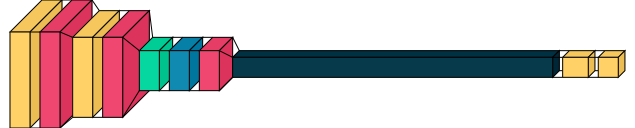

In [5]:
## Visualize the neuron network layer
vk.layered_view(model)

In [6]:
# Search with key word "Reduce learning rate" and "Early stopping" for more detail
# Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
reduceLearningRate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
# Stop training when a monitored metric has stopped improving.
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# Train model with .fit function
history = model.fit(
    # Pass train_data and train_labels (the pre-process data saved before)
    trainData,
    trainLabels,
    # Pass the pre-process test data and labels to validation_data
    validation_data=(testData, testLabels),
    # Train model with 10 epochs and have batch size is 200
    # Definition of epochs and batch size: https://www.phamduytung.com/blog/2018-10-02-understanding-epoch-batchsize-iterations/
    epochs=5,
    batch_size=100,
    # Pass callbacks to Early stopping by two checkpoints
    # Read Early stopping method for more detail
    callbacks=[reduceLearningRate, earlyStopping]
)
model.save(r'bestModel.h5')

Epoch 1/5
3540/3540 [==============================] - 40s 9ms/step - loss: 0.1536 - accuracy: 0.9556 - val_loss: 0.0918 - val_accuracy: 0.9734 - lr: 0.0010
Epoch 2/5
 838/3540 [======>.......................] - ETA: 27s - loss: 0.0749 - accuracy: 0.9771

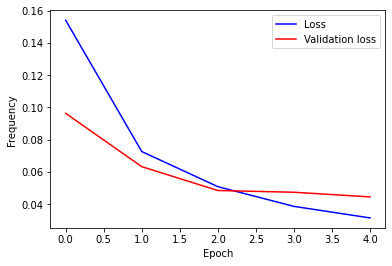

In [ ]:
## See the result
## Plot loss and val_loss frequency in each epoch 
plt.plot(history.history["loss"], 'b', label="Loss")
plt.plot(history.history["val_loss"], 'r', label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Predict', ylabel='Actual'>

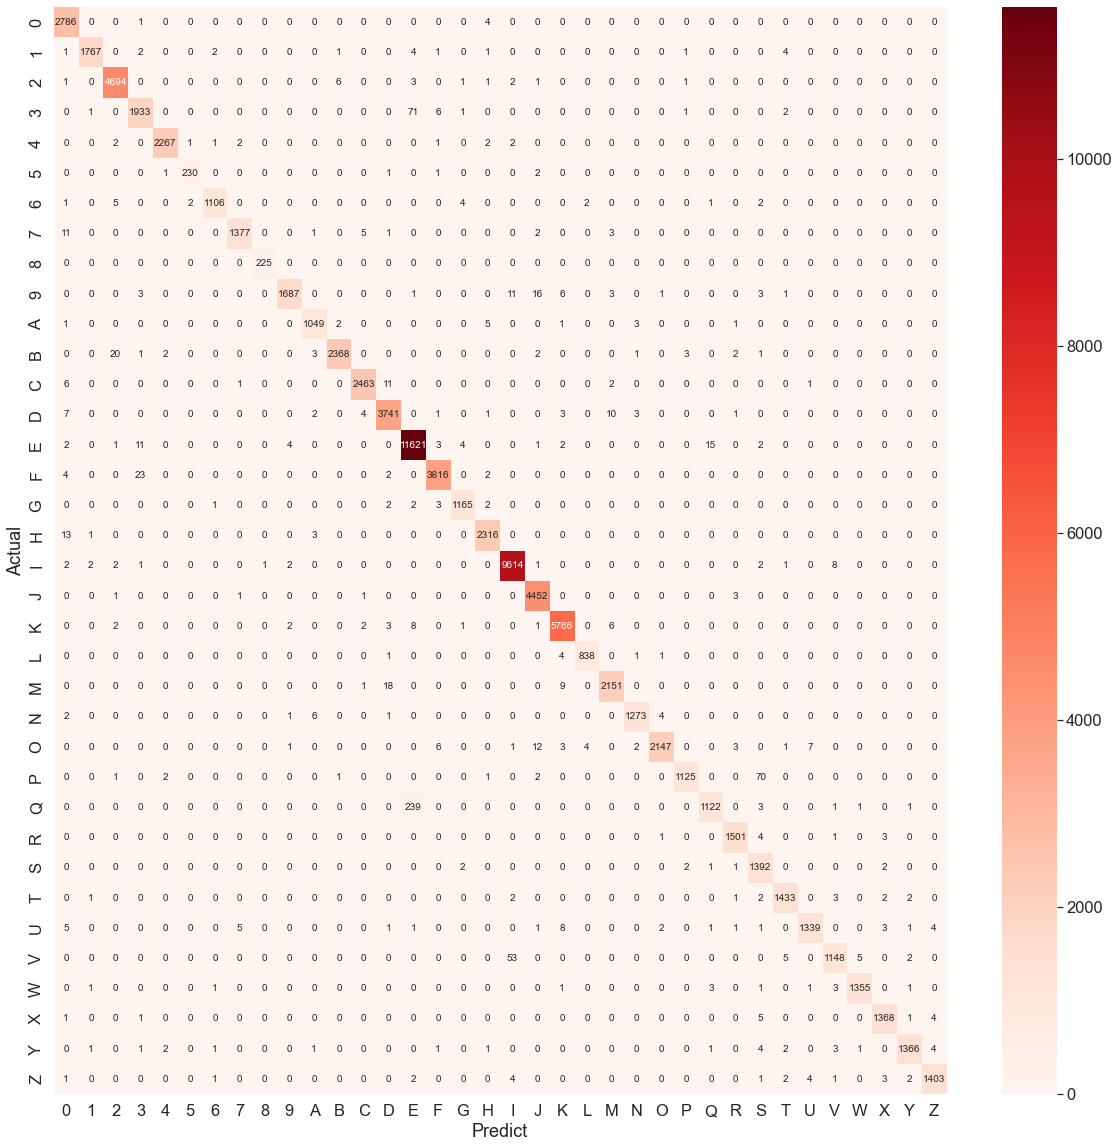

In [ ]:
## Predict model by passing testData
predictions = model.predict(testData)

## Pass testLabels and predictions to confusion matrix
matrix = confusion_matrix(
    np.argmax(testLabels, axis=1),
    np.argmax(predictions, axis=1)
)
## Plot confusion matrix with matplotlib
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
          '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

DataFrameMatrix = pd.DataFrame(matrix, columns=np.unique(labels), index = np.unique(labels))
DataFrameMatrix.index.name = 'Actual'
DataFrameMatrix.columns.name = 'Predict'
plt.figure(figsize = (20,20))
sn.set(font_scale=1.5) 
sn.heatmap(DataFrameMatrix, cmap="Reds", annot=True, annot_kws={"size": 10}, fmt="d")